# Week 1: Early atomic physics, the Hydrogen atom, and calulation methods

This notebook is to accompany the _Week 1_ content for the atomic physics component of KYA323: Atomic and nuclear physics at the University of Tasmania.

**Version**: 1.0  
**Created**: 01/02/2024 (AJM)  
**Updated**: 19/07/2024 (AJM)

## Import packages

To streamline operations in Python, packages can be imported to perform a host of various tasks. To make this process as simple as possible, all the required packages are included in the file _[Atomic.py](https://github.com/Andy-UTAS/atomic-physics/blob/master/Atomic.py)_ and thus we can import all of the content: 

In [1]:
from Atomic import *

Atomic.py - the package for atomic physics content for use in KYA323 has been loaded. 

Core package versions are as follows:
Matplotlib 3.7.1
NumPy 1.25.0


## Early atomic physics

### Spectrum of atomic hydrogen

#### Theoretical

It is a simple task to compute the energy spectrum of Hydrogen following the Bohr's formula

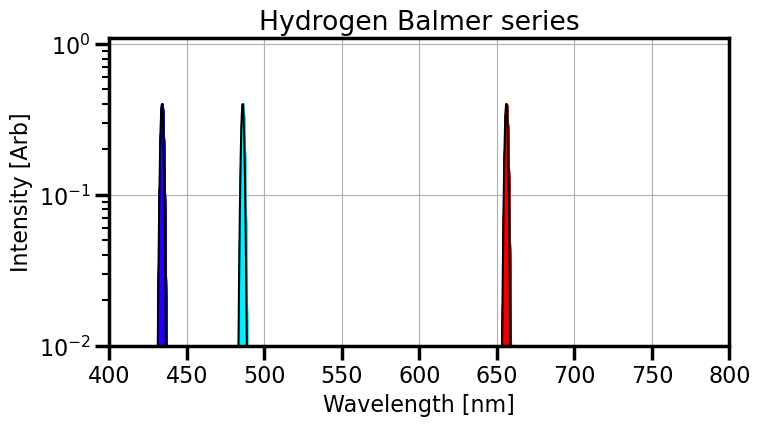

In [2]:
def h_lambda(n1, n2):
    """
    h_lambda calculates the wavelength of transitions in atomic hydrogen with the Rydberg formula.

    :param n1: The lower energy level
    :param n2: The upper energy level
    :return: The wavelength of the transition in nanometres
    """ 
    inv = const.Rydberg * (1/n1 ** 2 - 1/n2 ** 2)
    return 1e9/inv

balmer = [h_lambda(2,n) for n in np.arange(3,6)] # Calacule the first lines in the Balmer series (the visible transitions)

# Make a Gaussian centred on each of the Balmer lines
x_vals = np.arange(-3, 3, 0.01) # x-values of the peak
I = norm.pdf(x_vals,0,1) # Intensity of each peak
h_spectrum = [x_vals + i for i in balmer] # List of peaks for hydrogen spectrum

# Plot the spectrum
fig, ax = plt.subplots(figsize=(8,4)) # Initialise the plot

for j in h_spectrum:
    l = j
    colours = [wavelength_to_rgb(i) for i in j] # This is a fancy function to match wavelength values to the corresponding colour
    for xc, ym, col in zip(l, I, colours):
        ax.axvline(x=xc, ymin = 0, ymax = np.log10(ym/.01)/np.log10(110), c=col, linewidth=1, alpha = 1) # Draw a coloured line from the base of the plot to the intensity of the spectrum at that value of the wavelength

    ax.plot(l, I, c = 'black') # Plot the spectrum

plt.yscale('log') # Set the y scaling to be logarithmic
plt.grid(True) # Insert a grid
plt.xlim(400,800) # Manually specify the range of y values plotted
plt.ylim(.01,1.1) # Manually specify the range of y values plotted
plt.xlabel('Wavelength [nm]') # Label the x axis
plt.ylabel('Intensity [Arb]') # Label the y axis
plt.title('Hydrogen Balmer series') # Set the title

if savefigflag: # Change to True to save the figures
    plt.savefig('images/01-01_01-H-balmer.svg', bbox_inches= 'tight') # Name each figure by the lamp element

plt.show()

#### Experimental

This is some data taken from the first-year spectroscopy experiment. The spectrometer is nothing fancy, but does the job. Here we import spectral data from a Hydrogen lamp

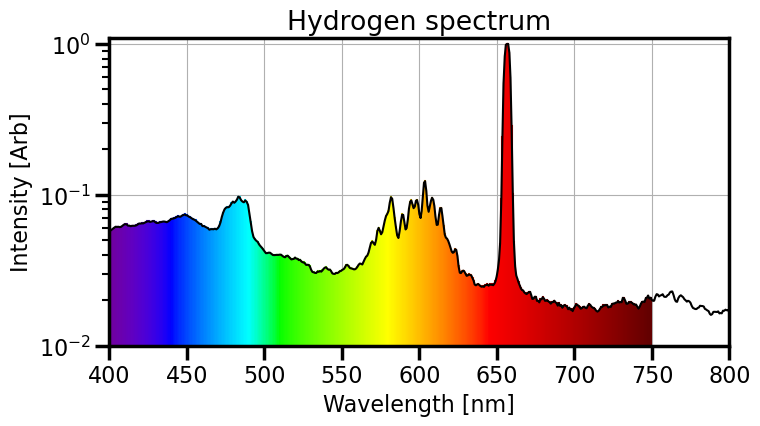

In [3]:
df = pd.read_csv('Data/Hydrogen.csv') # Load the spectrum
df['Norm']= df['Latest: Intensity (rel)']/df['Latest: Intensity (rel)'].max() # Create a normalised instenisty column
l = df['Latest: Wavelength (nm)'] # Wavelength
I = df['Norm'] # Intensity

colours = [wavelength_to_rgb(i) for i in l[l<750]] # Set the colour for each wavelength value

fig, ax = plt.subplots(figsize=(8,4)) # Initialise the plot

# Loop over each wavelength value
for xc, ym, col in zip(l, I, colours):
    ax.axvline(x=xc, ymin = 0, ymax = np.log10(ym/.01)/np.log10(110), c=col, linewidth=1.5, alpha = 1) # Draw a coloured line from the base of the plot to the intensity of the spectrum at that value of the wavelength

ax.plot(l, I, c = 'black') # Plot the spectrum

plt.yscale('log') # Set the y scaling to be logarithmic
plt.grid(True) # Insert a grid
plt.xlim(400,800) # Manually specify the range of y values plotted
plt.ylim(.01,1.1) # Manually specify the range of y values plotted
plt.xlabel('Wavelength [nm]') # Label the x axis
plt.ylabel('Intensity [Arb]') # Label the y axis
plt.title('Hydrogen spectrum') # Set the title

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/01-01_02-H-spec-meas.svg', bbox_inches= 'tight') # Name each figure by the lamp element

plt.show() # Show the plot

### Classical radiative lifetime

The classical radiative lifetime of a transition can be calculated via

$$
\frac{1}{\tau} = \frac{e^2 \omega^2}{6\pi\epsilon_0 m_e c^3}
$$

and this can be compared to the measured values for major transitions in the group I elements (values taken from [Metcalf](https://link.springer.com/book/10.1007/978-1-4612-1470-0), Appendix C)


In [4]:
def lifetime(l):
    """
    lifetime calculates the classical radiative lifetime of transitions based on the wavelength

    :param l: The wavelength of the transition in nanometres
    :return: The classical lifetime of the transition in nanoseconds
    """ 
    omega = 2*pi*c/(l*1e-9) # convert wavelength to angular frequency
    x = (e*omega) ** 2 / (6 * pi * epsilon_0 * m_e * c ** 3) 
    return 1e9/x

df = pd.read_csv('Data/linewidths.csv') # Load the spectrum
df['tau'] = lifetime(df[' Wavelength'])
print(df)

    Element   Wavelength   Lifetime        tau
0  Hydrogen       121.57       1.60   0.664709
1   Lithium       670.96      26.87  20.247541
2    Sodium       589.16      15.90  15.611532
3  Rubidium       780.24      26.63  27.380126
4   Caesium       852.35      30.70  32.674952


---

## The hydrogen atom

### Effective potential as a function of the orbital quantum number

The effective potential (in atomic units) can be calculated via

$$
-\frac{Z}{r} + \frac{l(l+1)}{2r^2}
$$

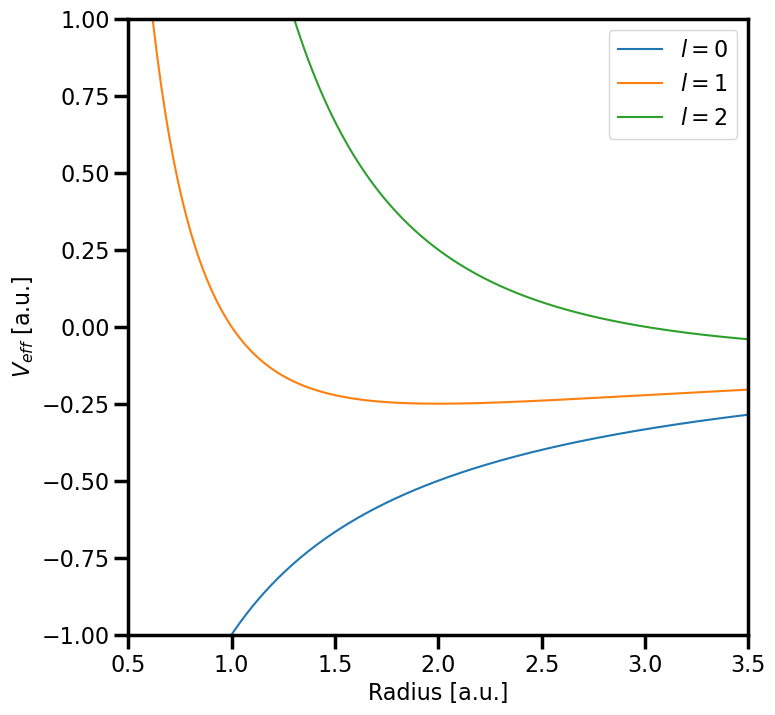

In [5]:
def v_eff(r, l, Z=1):
    """
    v_eff calculates the radial potential as a function of the orbital quantum number .

    :param r: The radial coordinate [a.u.]
    :param l: The orbital quantum number
    :param Z: The nuclear charge, default value = 1
    :return: The effective potential [a.u.]
    """ 
    return -Z/r + (l * (l+1))/(2 * r ** 2)

# Create the x values over which the potential will be plotted
x_vals = np.arange(.5, 5, 0.01) # x-values of the peak

# Plot the spectrum
fig, ax = plt.subplots(figsize=(8,8)) # Initialise the plot

# Loop over orbital quantum number
for l in np.arange(3):
    y_vals = v_eff(x_vals, l) # calculate the y-values of the plot
    ax.plot(x_vals, y_vals, label='$l=${}'.format(l)) # plot the potential

plt.xlim(.5,3.5) # Manually specify the range of y values plotted
plt.ylim(-1,1) # Manually specify the range of y values plotted
plt.xlabel('Radius [a.u.]') # Label the x axis
plt.ylabel('$V_{eff}$ [a.u.]') # Label the y axis
plt.legend()

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/01-02_01-V_eff.svg', bbox_inches= 'tight')

plt.show()

### Hydrogen wavefunction

#### Normalized Radial Function

The radial function describes the behavior of the electron as a function of distance
from the nucleus, providing a means to visualize the density of electron clouds at different distances from the nucleus. 

$$
R_{n \ell}(r) = \sqrt{\left( \frac{2}{n a_0} \right)^3 \frac{(n-\ell-1)!}{2n(n+\ell)!}} e^{-\frac{r}{n a_0}} \left( \frac{2r}{n a_0} \right)^{\ell} L_{n-\ell-1}^{2\ell+1}\left(\frac{2r}{n a_0}\right)
$$

In [6]:
def radial_function(r, n, l):
    """ Compute the normalized radial part of the wavefunction using
    Laguerre polynomials and an exponential decay factor.

    Args:
        l (int): azimuthal quantum number
        r (numpy.ndarray): radial coordinate
        n (int): principal quantum number
    Returns:
        numpy.ndarray: wavefunction radial component
    """

    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    constant_factor = np.sqrt(
        ((2 / n * a0) ** 3 * (sp.factorial(n - l - 1))) /
        (2 * n * (sp.factorial(n + l)))
    )
    return constant_factor * np.exp(-p / 2) * (p ** l) * laguerre(p)

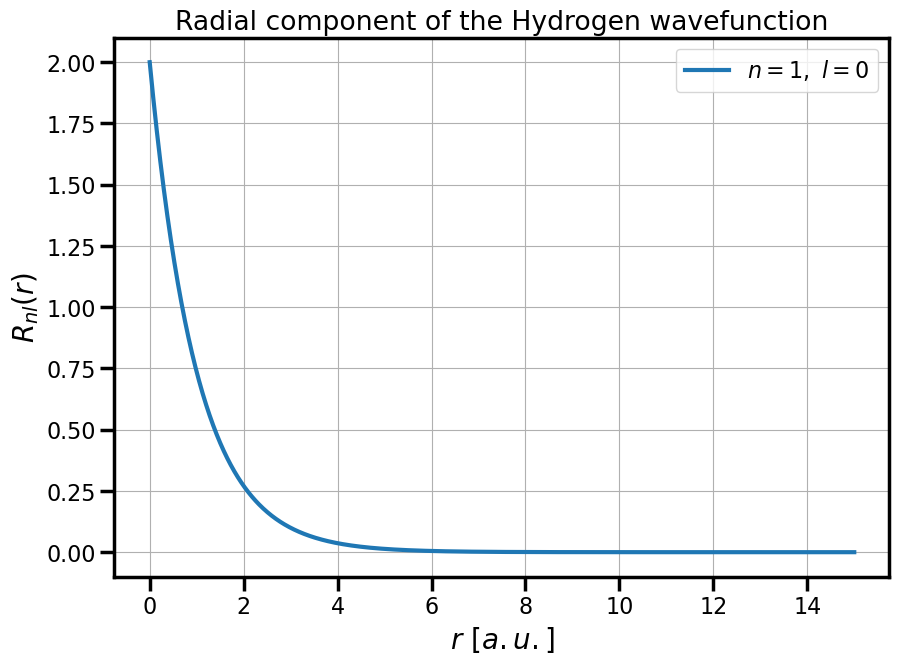

In [7]:
r = a0 * np.linspace(0,15,1000) 
def radial_wf(n,l):
    return radial_function(r,n,l)

n, l = 1, 0

plt.plot(r/a0, radial_wf(n,l)/(a0 ** (3/2)) , lw=3, label = r'$n={},~l={}$'.format(n,l))
plt.xlabel('$r~[a.u.]$',fontsize=20)
plt.ylabel('$R_{nl}(r)$', fontsize=20)
plt.title('Radial component of the Hydrogen wavefunction')
plt.legend()
plt.grid('True')

We can plot the radial component of the Hydrogen wavefunction over a number of $n$ values:

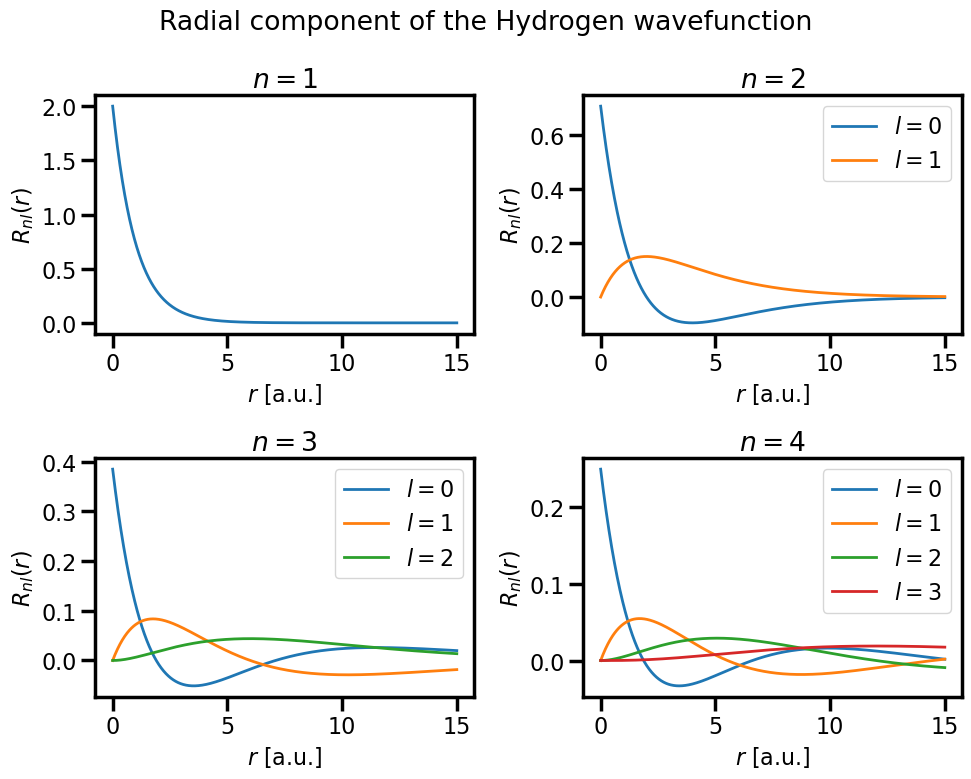

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Radial component of the Hydrogen wavefunction')

axs[0, 0].plot(r/a0, radial_wf(1,0)/(a0 ** (3/2)) , lw=2)
axs[0, 0].set_title('$n=1$')

for i in range(2):
    axs[0, 1].plot(r/a0, radial_wf(2,i)/(a0 ** (3/2)) , lw=2, label = r'$l={}$'.format(i))
axs[0, 1].legend()
axs[0, 1].set_title('$n=2$')

for i in range(3):
    axs[1, 0].plot(r/a0, radial_wf(3,i)/(a0 ** (3/2)) , lw=2, label = r'$l={}$'.format(i))
axs[1, 0].legend()
axs[1, 0].set_title('$n=3$')

for i in range(4):
    axs[1, 1].plot(r/a0, radial_wf(4,i)/(a0 ** (3/2)) , lw=2, label = r'$l={}$'.format(i))
axs[1, 1].legend()
axs[1, 1].set_title('$n=4$')

for ax in axs.flat:
    ax.set(xlabel='$r$ [a.u.]', ylabel='$R_{nl}(r)$')

fig.tight_layout()

if savefigflag: # Change to True to save the figures
    plt.savefig('Images/01-02_02-radial_wf.svg', bbox_inches= 'tight')
    
plt.show()

#### Radial probability density

The radial probability density is calculated via

$$
D_{nl} = r^2 |R_{nl}(r)|^2
$$

This plot also includes some annotations to demonstrate the probability of finding an electron at a radius less than $a_0$, and the expected value for $r$

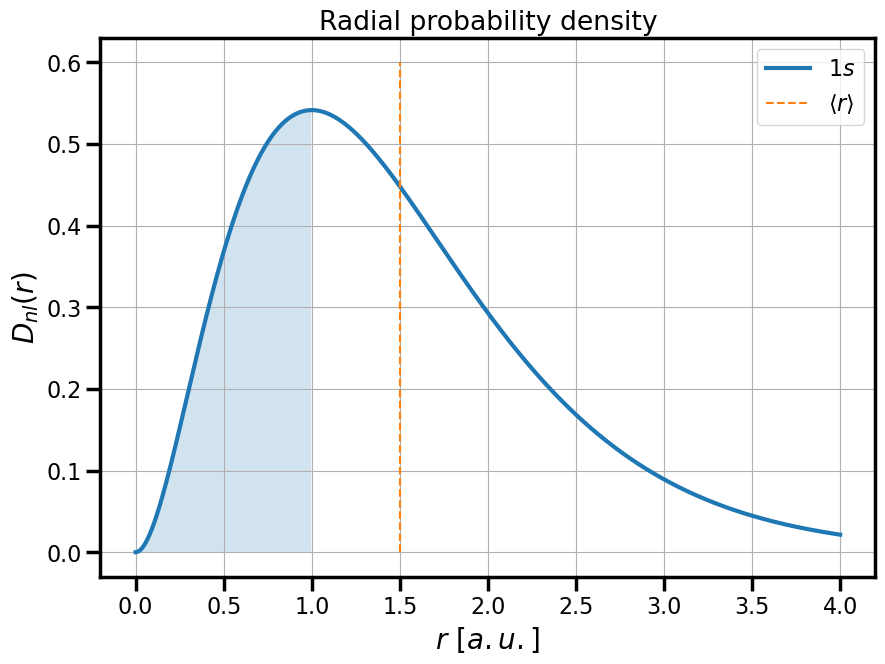

In [9]:
r = a0 * np.linspace(0,4,1000) 
def radial_wf(n,l):
    return radial_function(r,n,l)

n, l = 1, 0

x = r/a0
y = (r/a0)**2 * (radial_wf(n,l)/(a0 ** (3/2))) ** 2

fig, ax = plt.subplots()
ax.plot(x, y , lw=3, label = r'1$s$')
ax.fill_between(x, 0, y, where=(x<1), alpha=0.2)

plt.vlines(3/2, 0, 0.6, colors='C1', linestyles='dashed', label=r'$\langle r \rangle$')
plt.xlabel('$r~[a.u.]$',fontsize=20)
plt.ylabel('$D_{nl}(r)$', fontsize=20)
plt.title('Radial probability density')
plt.legend()
plt.grid('True')

if savefigflag: # Change to True to save the figures
    plt.savefig('images/01-02_03-radial_prob_1s.svg', bbox_inches= 'tight')
    
plt.show()

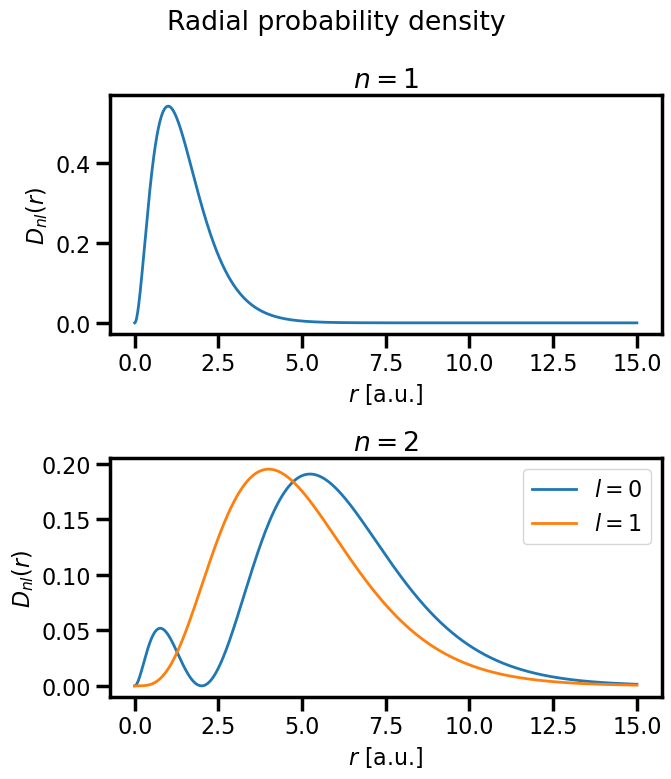

In [10]:
r = a0 * np.linspace(0,15,1000) 

fig, axs = plt.subplots(2, 1, figsize=(7,8))
fig.suptitle('Radial probability density')

axs[0].plot(r/a0, (r/a0)**2 * (radial_wf(1,0)/(a0 ** (3/2))) ** 2 , lw=2)
axs[0].set_title('$n=1$')

for i in range(2):
    axs[1].plot(r/a0, (r/a0)**2 * (radial_wf(2,i)/(a0 ** (3/2))) ** 2 , lw=2, label = r'$l={}$'.format(i))
axs[1].legend()
axs[1].set_title('$n=2$')

for ax in axs.flat:
    ax.set(xlabel='$r$ [a.u.]', ylabel='$D_{nl}(r)$')

fig.tight_layout()

if savefigflag: # Change to True to save the figures
    plt.savefig('images/01-02_04_radial_prob.svg', bbox_inches= 'tight')
    
plt.show()


#### Normalized Angular Function

The angular function is described by spherical harmonics and is a function of the polar angle
and the azimuthal angle . The angular function gives the shape and orientation of the atomic orbitals.

$$
Y_{\ell}^{m}(\theta, \phi) = (-1)^m \sqrt{\frac{(2\ell+1)}{4\pi}\frac{(\ell-m)!}{(\ell+m)!}} P_{\ell}^{m}(\cos\theta) e^{im\phi}
$$

In [11]:
def angular_function(theta, phi, l, m):
    """ Compute the normalized angular part of the wavefunction using
    Legendre polynomials and a phase-shifting exponential factor.

    Args:
        theta (numpy.ndarray): polar angle
        phi (numpy.ndarray): azimuthal angle
        l (int): azimuthal quantum number
        m (int): magnetic quantum number
    Returns:
        numpy.ndarray: wavefunction angular component
    """

    legendre = sp.lpmv(m, l, np.cos(theta))

    constant_factor = ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * sp.factorial(l - np.abs(m))) /
        (4 * np.pi * sp.factorial(l + np.abs(m)))
    )
    return constant_factor * legendre * np.real(np.exp(1.j * m * phi))

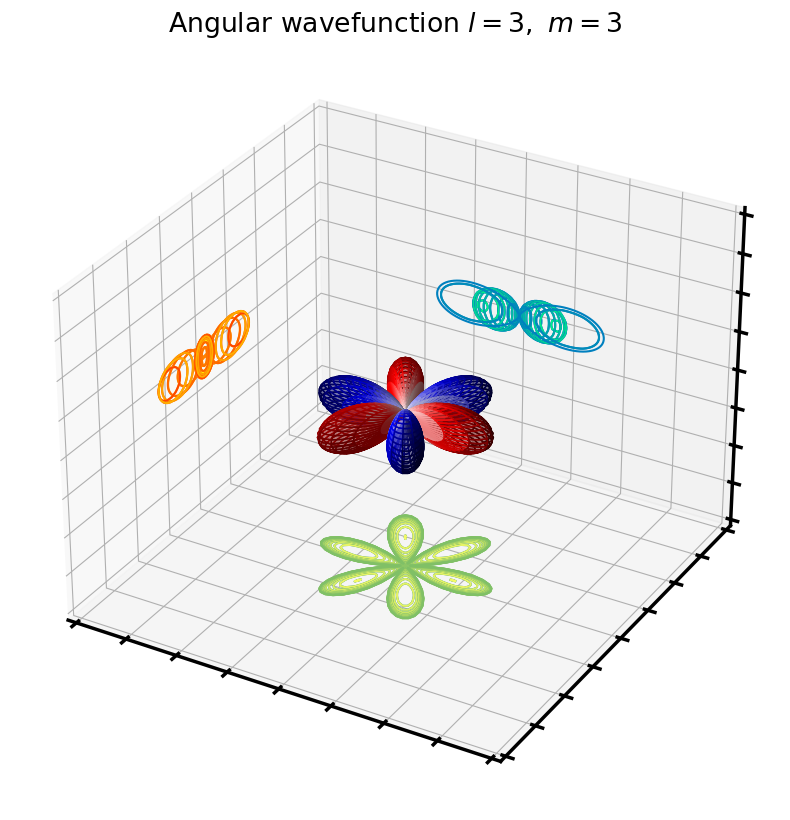

In [12]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

l, m = 3, 3

Ylm = angular_function(phi,theta,l,m)

x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

'''Set up the 3D Canvas'''

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

''' Normalize color bar to [0,1] scale'''

fcolors = (Ylm - Ylm.min())/(Ylm.max() - Ylm.min())

'''Make 3D plot of real part of spherical harmonic'''

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)


''' Project 3D plot onto 2D planes'''

cset = ax.contour(x, y, z,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x, y, z,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x, y, z,20, zdir='x',offset = -1, cmap='autumn')


''' Set axes limit to keep aspect ratio 1:1:1 '''

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
frame1.axes.zaxis.set_ticklabels([])

plt.title('Angular wavefunction $l={},~m={}$'.format(l,m))

plt.show()

#### Normalized Wavefunction

The total wavefunction for the hydrogen atom is the product of the radial and angular components.

$$
\psi_{n \ell m}(r, \theta, \varphi) = R_{n \ell}(r) Y_{\ell}^{m}(\theta, \varphi)
$$

In [13]:
def compute_wavefunction(n, l, m, a0_scale_factor):
    """ Compute the normalized wavefunction as a product
    of its radial and angular components.

    Args:
        n (int): principal quantum number
        l (int): azimuthal quantum number
        m (int): magnetic quantum number
        a0_scale_factor (float): Bohr radius scale factor
    Returns:
        numpy.ndarray: wavefunction
    """

    # x-y grid to represent electron spatial distribution
    grid_extent = 480
    grid_resolution = 680
    x = y = np.linspace(-grid_extent, grid_extent, grid_resolution)
    x, y = np.meshgrid(x, y)

    # Use epsilon to avoid division by zero during angle calculations
    eps = np.finfo(float).eps

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(
        (a0 / a0_scale_factor) * np.sqrt((x ** 2 + y ** 2)), n, l 
    ) * angular_function(
        np.arctan(x / (y + eps)), 0, m, l
    )
    return psi


#### Probability Density | Electron Density

Quantifies the probabilities of finding a particle, such as an electron, at a particular point in space.

$$
|\psi_{n \ell m}|^2
$$

In [14]:
def compute_probability_density(psi):
    """ Compute the probability density of a given wavefunction.
    Args:
        psi (numpy.ndarray): wavefunction
    Returns:
        numpy.ndarray: wavefunction probability density
    """
    return np.abs(psi) ** 2

Time premitting, this section will be expanded, but in the meantime, there are many excellent places to find computations of hydrogenic wavefunctions, for example: [here](https://github.com/ssebastianmag/hydrogen-wavefunctions/tree/main)

---

## Calculation methods for real systems

### The harmonic oscillator

This is code borrowed from the [solid-state component](https://github.com/Andy-UTAS/Solid-state) of KYA322: Statiscical and solid-state physics, used to visualise the energy eigenstates of the harmonic oscillator

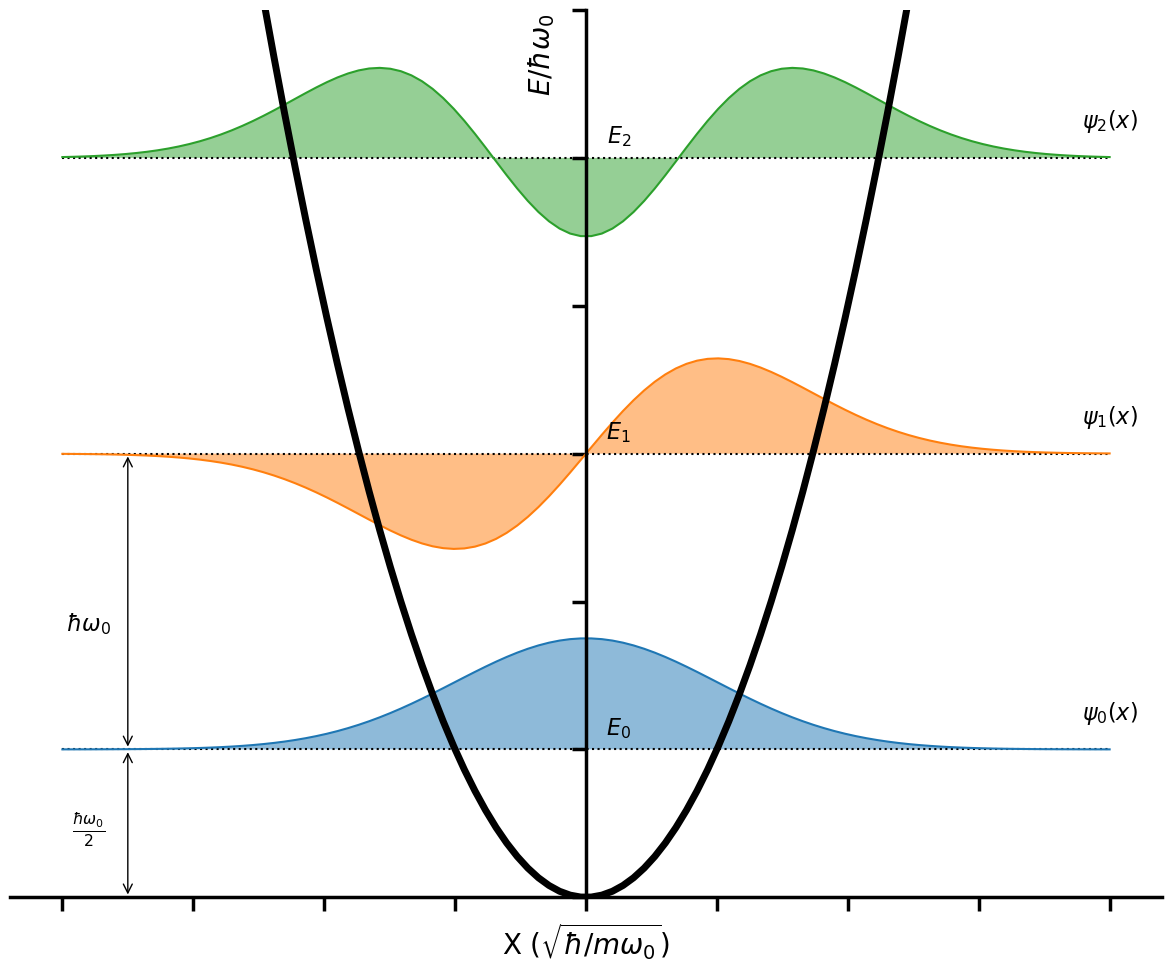

In [15]:
def ho_evec(x, n, no_states):

    """
    Calculate the wavefunction of states confined in the harmonic oscillator

    Input:
    ------
    x: numpy array of x coordinates (in units of hbar.omega)
    n: n^th bound state in the oscillator
    no_states: no of states confined

    Returns:
    --------
    Wavefunctions

    """

    # calculate hermite polynomial
    vec = [0] * no_states
    vec[n] = 1/2
    Hn = np.polynomial.hermite.Hermite(vec)

    return ((1/np.sqrt(math.factorial(n)*2**n))*
            pow(np.pi,-1/4)*
            np.exp(-pow(x, 2)/2)*
            Hn(x))

def h0_ener(n):
    """
    Calculate the energy of nth bound state
    """
    return (n + 1/2)

x = np.linspace(-4, 4, 100) #units of hbar.omega
no_states = 3 #no of bound states confined in the quantum well

omega = 1.0 #frequency of harmonic oscillator
V = 0.5*(omega**2)*(x**2)

fig, ax = plt.subplots(figsize=(12, 10))

for i in range(no_states):

    ax.hlines(h0_ener(i), x[0], x[len(x)-1], linestyles='dotted', colors='k')

    ax.plot(x, ho_evec(x, i, no_states) + h0_ener(i)) #plot wavefunctions


    # annotate plot
    # label each wavefunction
    ax.text(x[len(x)-1], h0_ener(i)+1/10, r'$\psi_{} (x)$'.format(i),
             horizontalalignment='center', fontsize=16)
    
    # label each energy
    ax.text(1/4, h0_ener(i)+1/20, '$E_{}$'.format(i),
             horizontalalignment='center', fontsize=16)
    
    # label energy spacing
    # ground-state energy
    if i==0:
        ax.text(x[0]+1/5, 2*h0_ener(i)/5, r'$\frac{\hbar\omega_0}{2}$',
                 horizontalalignment='center', fontsize=16)

        ax.annotate("", xy=(x[0]+1/2, h0_ener(i)-1/2),
                    xytext=(x[0]+1/2, h0_ener(i)),
                    arrowprops=dict(arrowstyle="<->"))
        
    # state-separation energy
    elif i==1:
        ax.text(x[0]+1/5, h0_ener(i-1)+2/5, r'$\hbar\omega_0$',
                 horizontalalignment='center', fontsize=16)
        
        ax.annotate("", xy=(x[0]+1/2, h0_ener(i)),
                    xytext=(x[0]+1/2, h0_ener(i-1)),
                    arrowprops=dict(arrowstyle="<->"))

    ax.fill_between(x, h0_ener(i), ho_evec(x, i, no_states) + h0_ener(i), alpha=0.5)

ax.plot(x, V, 'k', linewidth=5) # plot harmonic potential

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set x and y labels
ax.set_xlabel('X '+ r'($\sqrt{\hbar/m\omega_0}$)', fontsize=20)
ax.set_ylabel('$E/\hbar\omega_0$', fontsize=20)
ax.yaxis.set_label_coords(0.475,.95)

# Set the y limit
ax.set_ylim((0,no_states))

plt.tight_layout()

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_01-harmonic_oscillator.svg', facecolor='white', transparent=False)

plt.show()

We now want to apply a perturbation to the harmoic oscillator. To visualise the potential, we can plot them on the same axis:

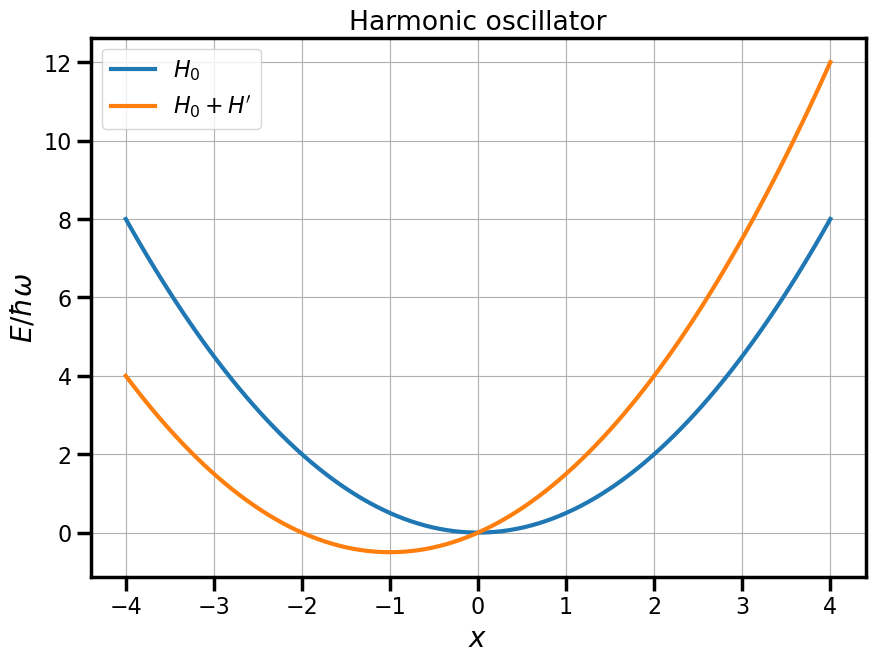

In [16]:
V = 0.5*(omega**2)*(x**2)
Vprime = V + omega * x

x = np.linspace(-4, 4, 100) #units of hbar.omega

fig, ax = plt.subplots()
ax.plot(x, V , lw=3, label = r'$H_0$')
ax.plot(x, Vprime , lw=3, label = r'$H_0+H^{\prime}$')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$E/\hbar\omega$', fontsize=20)
plt.title('Harmonic oscillator')
plt.legend()
plt.grid('True')

if savefigflag: # Change to True to save the figures
    plt.savefig('images/01-03_02-harmonic_potential.svg', bbox_inches= 'tight')
    
plt.show()

Now we want to plot the perturbed states. We are going to alter the functions from the original harmonic oscillator plot to show the perturbed eigenstates

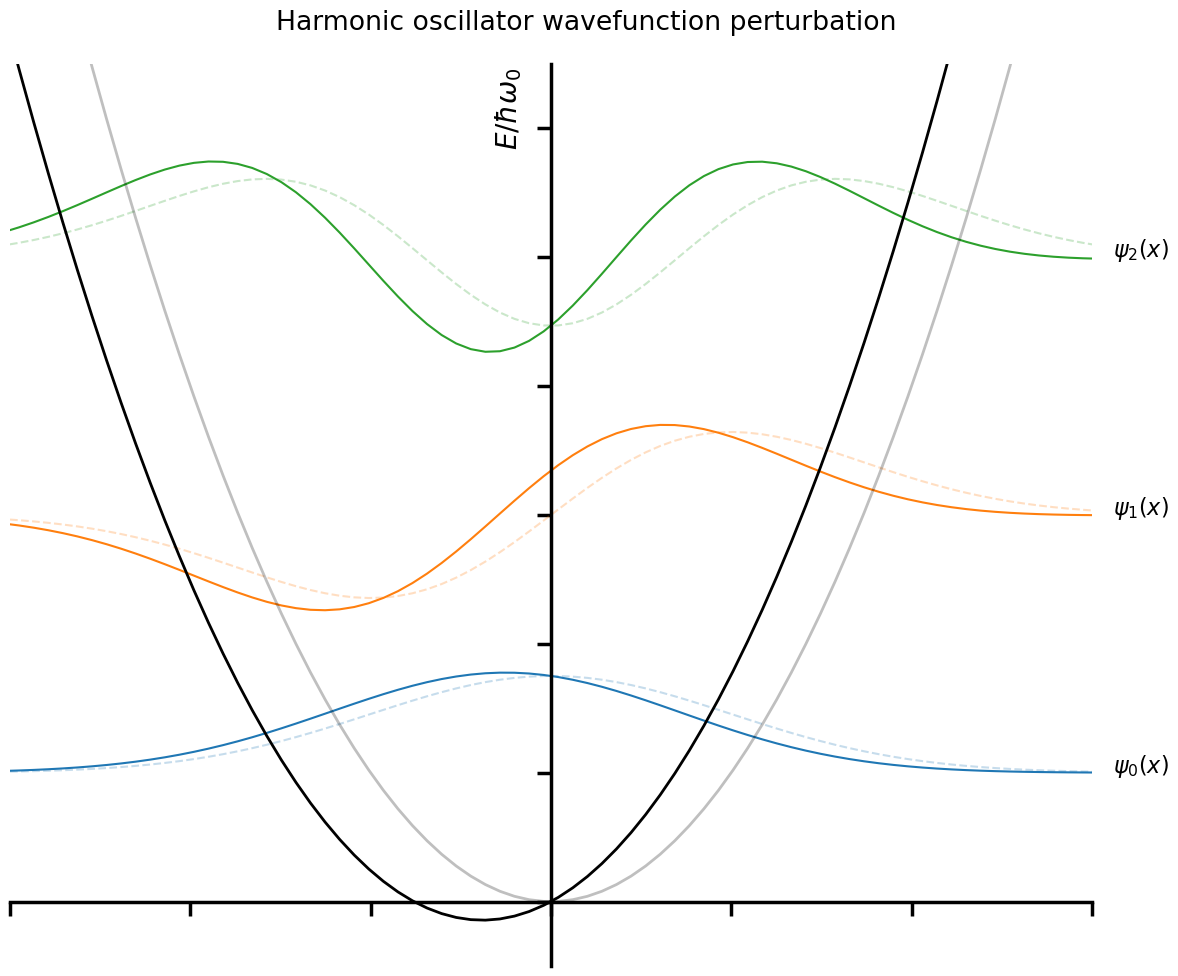

In [17]:
def ho_unperturbed(x, n, no_states):

    """
    Calculate the wavefunction of states confined in the harmonic oscillator

    Input:
    ------
    x: numpy array of x coordinates (in units of hbar.omega)
    n: n^th bound state in the oscillator
    no_states: no of states confined

    Returns:
    --------
    Wavefunctions

    """

    # calculate hermite polynomial
    vec = [0] * no_states
    vec[n] = 1/2
    Hn = np.polynomial.hermite.Hermite(vec)

    return ((1/np.sqrt(math.factorial(n)*2**n))*
            pow(np.pi,-1/4)*
            np.exp(-pow(x, 2)/2)*
            Hn(x))

def ho_perturbed(x, n, no_states):
    
    wf2 = ((n+1) ** 1/2) * ho_unperturbed(x, n+1, no_states+2)
    
    if n == 0:
        wf1 = 0
    elif n>0:
        wf1 = (n ** 1/2) * ho_unperturbed(x, n-1, no_states)
        
    return (C ** 1/2) * (wf1 - wf2)

def ho_unperturbed_ener(n):
    """
    Calculate the energy of nth bound state
    """
    return (n + 1/2)

def ho_perturbed_ener(n):
    """
    Calculate the energy of nth bound state
    """
    return ho_unperturbed_ener(n) - hbar*C

C = .76

x = np.linspace(-4, 4, 100) #units of hbar.omega
no_states = 3 #no of bound states confined in the quantum well

omega = 1.0 #frequency of harmonic oscillator
V_unpert = 0.5*(omega**2)*(x**2)
V_pert = V_unpert + (C/2 * x)

fig, ax = plt.subplots(figsize=(12, 10))

no_states = 3

for i in range(no_states):
    line, = ax.plot(x, ho_unperturbed(x, i, no_states) + ho_unperturbed_ener(i), linestyle = '--', alpha = 0.25) #plot wavefunctions
    ax.plot(x, ho_unperturbed(x, i, no_states) + ho_perturbed(x, i, no_states) + ho_perturbed_ener(i), color = line.get_color(), label = '$\Psi_{}$'.format(i))
    
    # annotate plot
    # label each wavefunction
    ax.text(x[len(x)-10], ho_unperturbed_ener(i), r'$\psi_{} (x)$'.format(i),
             horizontalalignment='center', fontsize=16)
    
ax.plot(x, V_unpert, 'k', linewidth=2, alpha = 0.25, label = '$V_0$') # plot harmonic potential
ax.plot(x, V_pert, 'k', linewidth=2,  label = '$V^\prime$') # plot harmonic potential

ax.set_xlim((-3,3))
# Set the y limit
ax.set_ylim((-0.25,3.25))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set y label
ax.set_ylabel('$E/\hbar\omega_0$', fontsize=20)
ax.yaxis.set_label_coords(0.475,.95)

# Adding a title to the figure
fig.suptitle('Harmonic oscillator wavefunction perturbation')

plt.tight_layout()

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_03-perturbed-harmonic_oscillator.svg', facecolor='white', transparent=False)

plt.show()

### Variational particle in a box

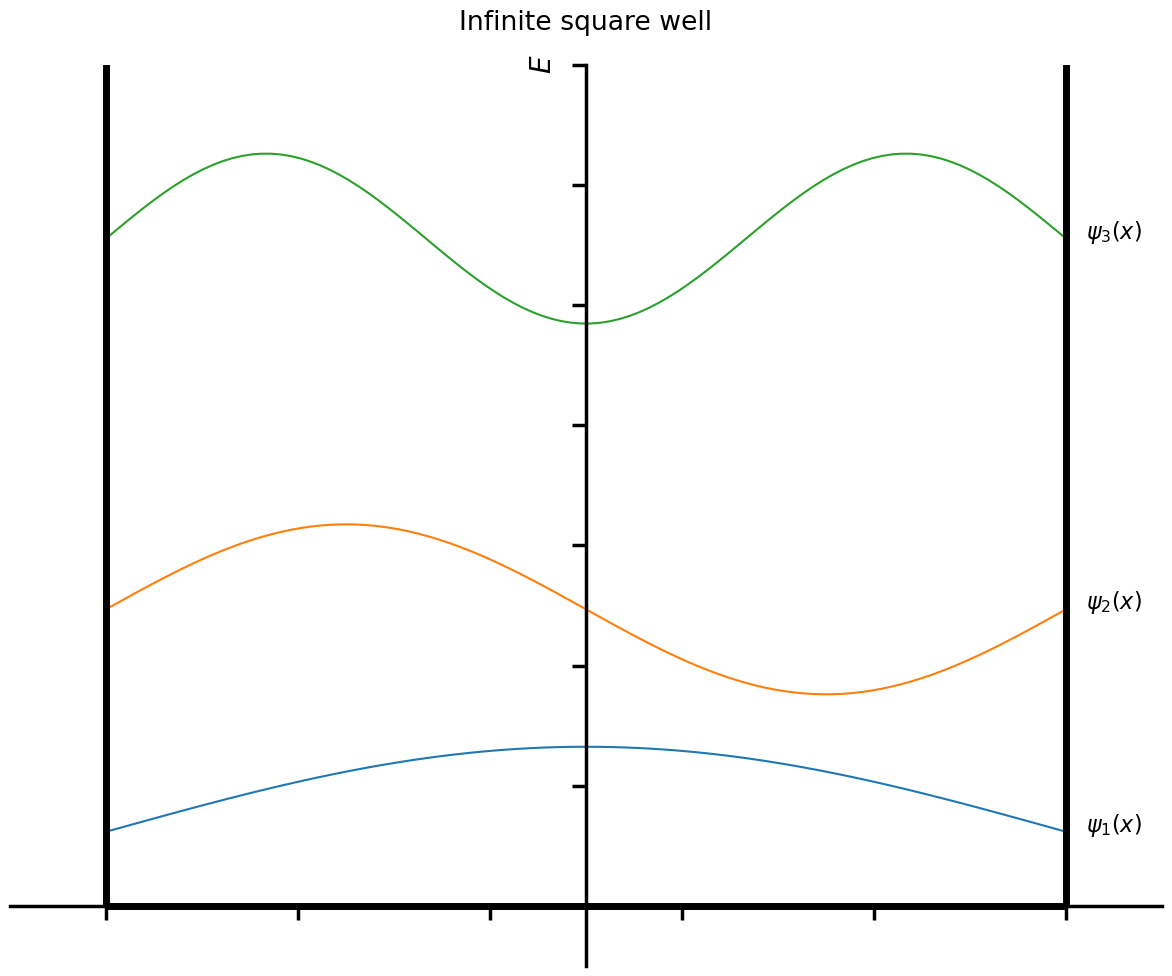

In [18]:
def sq_well_wfn(x, n):
    return np.sqrt(2/L) * np.sin(n * pi * x / L)

def sq_well_en(n):
    return (1/(2*m)) * (n * pi/ L) ** 2

L = 1
m = 4

x = np.linspace(0, L, 100) #units of nm

no_states = 4

fig, ax = plt.subplots(figsize=(12, 10))

for i in range(1, no_states):
    ax.plot(x, sq_well_wfn(x, i) + sq_well_en(i)) #plot wavefunctions

    # annotate plot
    # label each wavefunction
    ax.text(x[len(x)-1]*1.05, sq_well_en(i), r'$\psi_{} (x)$'.format(i),
             horizontalalignment='center', fontsize=16)

ax.hlines(0,0,L, color = 'black', linewidth = 5)
ax.vlines(L,0,100, color = 'black', linewidth = 5)
ax.vlines(0,0,100, color = 'black', linewidth = 5)

# # Set the x and y limits
ax.set_ylim((-1,14))
ax.set_xlim((0-L/10,L+L/10))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set y label
ax.set_ylabel('$E$', fontsize=20)
ax.yaxis.set_label_coords(0.475,1)

# Adding a title to the figure
fig.suptitle('Infinite square well')

plt.tight_layout()

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_04-square-well.svg', facecolor='white', transparent=False)

plt.show()

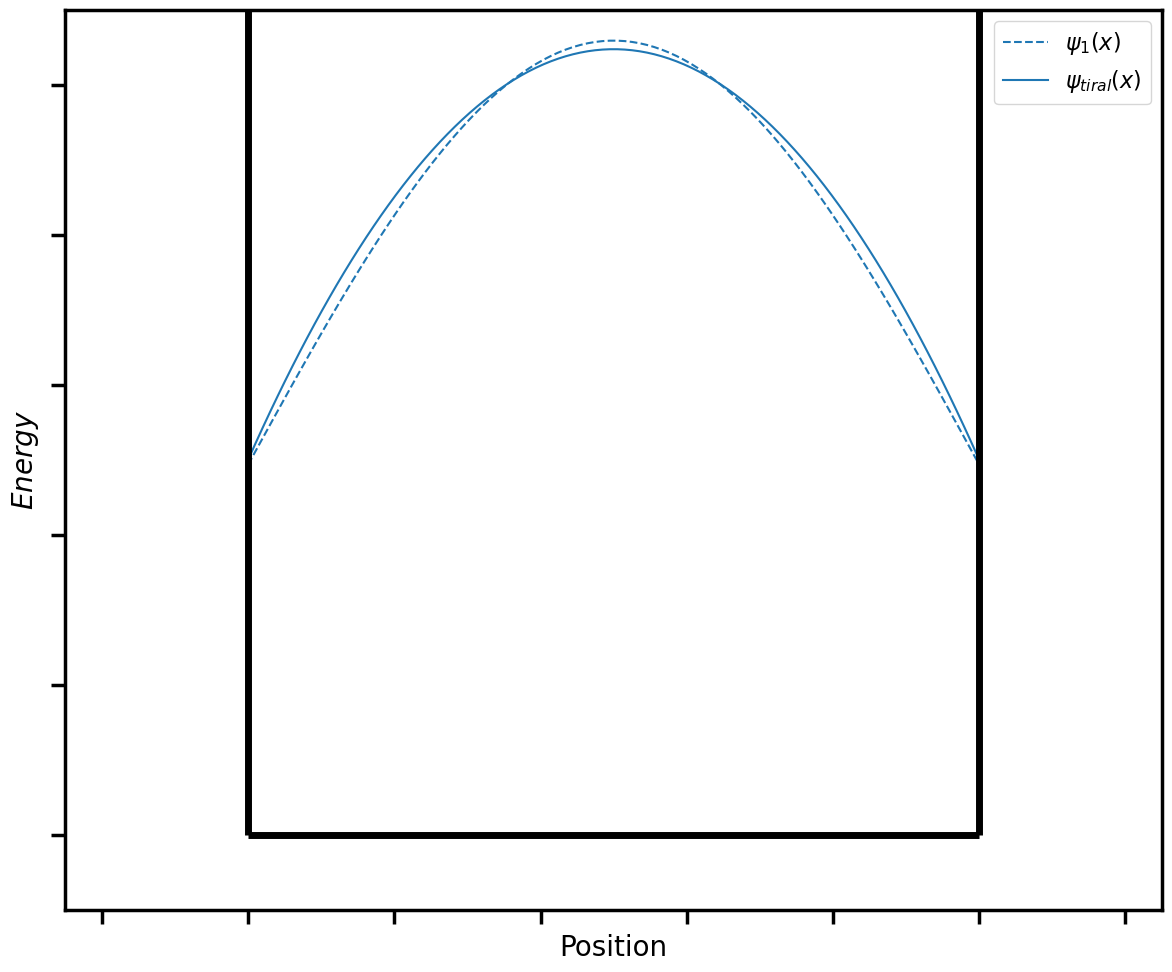

In [19]:
def trail_wfn(x):
    return (np.sqrt(30)/(L**(5/2)))*x*(L-x)

def trail_en():
    return 5 * L ** 2 / m

fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(x, sq_well_wfn(x, 1) + sq_well_en(1), '--', label = r'$\psi_{1} (x)$') #plot wavefunction
ax.plot(x, trail_wfn(x)+trail_en(), color = 'C0', label = r'$\psi_{tiral}(x)$')

ax.hlines(0,0,L, color = 'black', linewidth = 5)
ax.vlines(L,0,100, color = 'black', linewidth = 5)
ax.vlines(0,0,100, color = 'black', linewidth = 5)

# # Set the x and y limits
ax.set_ylim((-.25,2.75))
ax.set_xlim((0-L/4,L+L/4))

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set x and y label
ax.set_xlabel('Position', fontsize=20)
ax.set_ylabel('$Energy$', fontsize=20)

plt.legend()
plt.tight_layout()

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_05-variational-trail-wavefn.svg', facecolor='white', transparent=False)

plt.show()

### Numerical solution to sextic potential

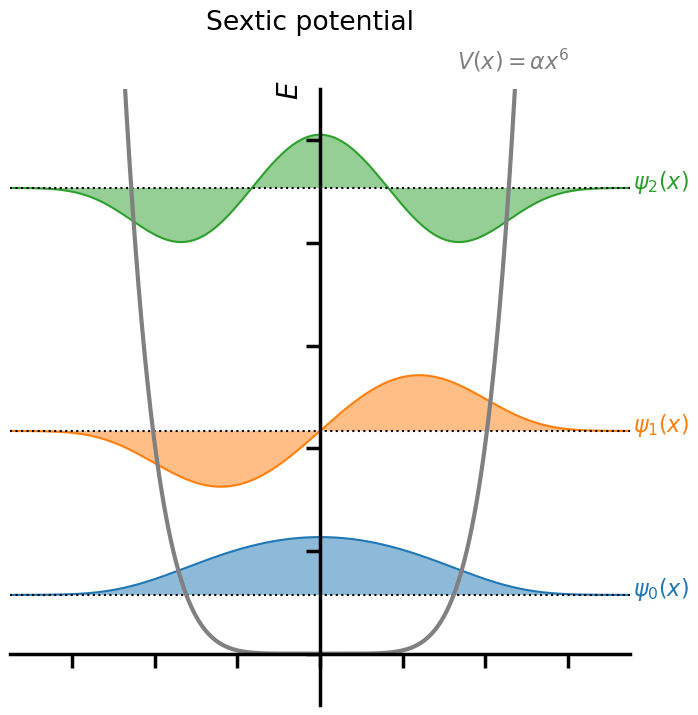

In [20]:
# Parameters
alpha = 5e-5  # Potential coefficient
xmin, xmax = -7.5, 7.5  # Range for x
N = 1000  # Number of points
dx = (xmax - xmin) / (N - 1)
x = np.linspace(xmin, xmax, N)

# Potential function V(x)
V = alpha * x**6

# Kinetic energy operator (discretized)
T = np.zeros((N, N))
for i in range(N):
    if i > 0:
        T[i, i-1] = T[i-1, i] = -1 / (2 * dx**2)
    T[i, i] = 1 / dx**2

# Hamiltonian H = T + V
H = T + np.diag(V)

# Solve for eigenvalues and eigenvectors using numpy
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Ensure the ground state wavefunction is mostly positive
for n in range(3):
    if eigenvectors[N//2, n] < 0:
        eigenvectors[:, n] = -eigenvectors[:, n]

# Plot the first three eigenstates
fig, ax = plt.subplots(figsize=(8, 8))

for n in range(3):
    line, = ax.plot(x, eigenvectors[:, n] + eigenvalues[n])
    ax.text(x[len(x)-1]*1.1, eigenvalues[n], r'$\psi_{} (x)$'.format(n),
             horizontalalignment='center', fontsize=16, color = line.get_color())

    ax.hlines(eigenvalues[n], x[0], x[len(x)-1], linestyles='dotted', colors='k')
    ax.fill_between(x, eigenvalues[n], eigenvectors[:, n] + eigenvalues[n], alpha=0.5)
    
ax.plot(x, V, color = 'gray', linewidth = 3)
ax.text(xmax/1.6, .57, r'$V(x)=\alpha x^6$', horizontalalignment='center', fontsize=16, color = 'gray')

# # Set the x and y limits
ax.set_ylim((-.05,.55))
ax.set_xlim((xmin, xmax))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set y label
ax.set_ylabel('$E$', fontsize=20)
ax.yaxis.set_label_coords(0.475,1)

# Adding a title to the figure
fig.suptitle('Sextic potential')

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_06-sextic.svg', facecolor='white', transparent=False)

plt.show()

### Sextic potential ground state approximation using a Gaussian wavefunction

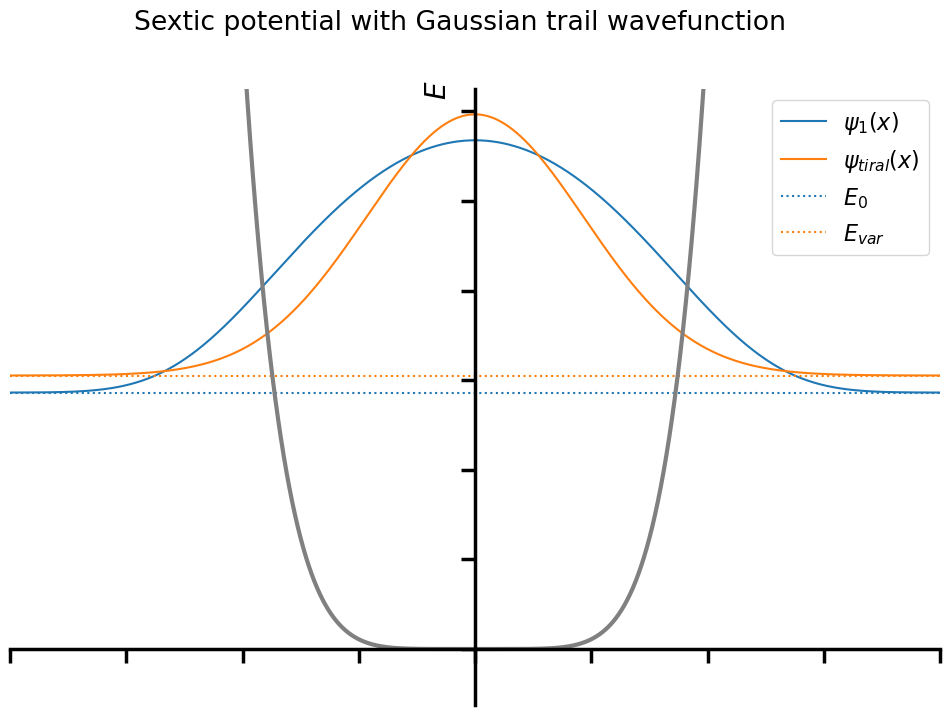

In [21]:
xmin, xmax = -10, 10  # Range for x
dx = (xmax - xmin) / (N - 1)
x = np.linspace(xmin, xmax, N)

# Plot the first three eigenstates
fig, ax = plt.subplots(figsize=(12, 8))

b = (45 * alpha / 32) ** (1/4)
A = (2 * b / pi)
guess = A * np.exp(-b * x ** 2)

E_var = (5 * alpha/18) ** (1/4)

l1, = ax.plot(x, eigenvectors[:, 0] + eigenvalues[0], label = r'$\psi_{1} (x)$') #plot wavefunction
l2, = ax.plot(x, guess+E_var, label = r'$\psi_{tiral}(x)$')

ax.hlines(eigenvalues[0], x[0], x[len(x)-1], linestyles='dotted', colors=l1.get_color(), label = r'$E_0$')
ax.hlines(E_var, x[0], x[len(x)-1], linestyles='dotted', colors=l2.get_color(), label = r'$E_{var}$')

ax.plot(x, V, color = 'gray', linewidth = 3)
# ax.text(xmax/1.6, .57, r'$V(x)=\alpha x^6$', horizontalalignment='center', fontsize=16, color = 'gray')

# # Set the x and y limits
ax.set_ylim((-.0125,.125))
ax.set_xlim((xmin, xmax))

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0.0))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Eliminate x and y axes labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Set y label
ax.set_ylabel('$E$', fontsize=20)
ax.yaxis.set_label_coords(0.475,1)

# Adding a title to the figure
fig.suptitle('Sextic potential with Gaussian trail wavefunction')

plt.legend()

# Save the figure
if savefigflag:
    plt.savefig('images/01-03_07-sextic_variational.svg', facecolor='white', transparent=False)

plt.show()